In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import numpy as np
import matplotlib.pyplot as plt 

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/anaconda3/envs/tf-gpu-c

In [2]:
from tensorflow.keras.datasets import imdb

Following along with the book Deep Learning with Python by Francois Chollet, 
determining positive or negative reviews


In [3]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words= 10000)

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
word_index = imdb.get_word_index()

### List decoding 
The imdb reviews are encoded so that the 10,000 most common words are given an integer each, and then the review is turned into a list. The dictionary which references this is word_index.items()
The function below, decodes a single review.


In [5]:
def Review_decode(review_index):
    reverse_word_index = dict(
        [(value, key) for (key,value) in word_index.items()])
    decoced_review = ' '.join(
    reverse_word_index.get(i-3,'?') for i in train_data [review_index]
    )
    return decoced_review

In order to input the reviews into a neural net in keras there are two options to vectorise the imput. Either have padded lists which have length = max length of the review. 
or each review can be encoded into a matrix of 10,000 x number words in review, where the inputs are one-hot. 

In [6]:
def vectorise_sequence(sequences, dimention = 10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
    

In [7]:
x_train = vectorise_sequence(train_data)
x_test = vectorise_sequence(test_data)


In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,partial_y_train,epochs= 20,batch_size=512,validation_data=(x_val,y_val))
history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples


2021-10-07 15:20:50.756832: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-07 15:20:50.777594: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3700055000 Hz
2021-10-07 15:20:50.778205: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55696ced4c50 executing computations on platform Host. Devices:
2021-10-07 15:20:50.778225: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-10-07 15:20:50.778808: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2021-10-07 15:20:50.801623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 15:20:50.801900: I tensorflow/cor

Epoch 1/20
 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6327 - acc: 0.6495

2021-10-07 15:20:51.099557: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.9.0


15000/15000 [==============================] - 1s 50us/sample - loss: 0.5114 - acc: 0.7788 - val_loss: 0.3951 - val_acc: 0.8561
Epoch 2/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.3056 - acc: 0.9015 - val_loss: 0.3123 - val_acc: 0.8791
Epoch 3/20
15000/15000 [==============================] - 1s 34us/sample - loss: 0.2224 - acc: 0.9281 - val_loss: 0.2779 - val_acc: 0.8907
Epoch 4/20
15000/15000 [==============================] - 1s 39us/sample - loss: 0.1784 - acc: 0.9412 - val_loss: 0.2782 - val_acc: 0.8876
Epoch 5/20
15000/15000 [==============================] - 1s 35us/sample - loss: 0.1435 - acc: 0.9541 - val_loss: 0.2803 - val_acc: 0.8886
Epoch 6/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1200 - acc: 0.9629 - val_loss: 0.2919 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.1016 - acc: 0.9695 - val_loss: 0.3132 - val_acc: 0.8825
Epoch 8/20
15000/15000 [==============

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Loss function 
This is plotting binary cross entropy, on the training data and the validation data. I think this is a classic example of overtraining, where the loss function is minimised for the small data set and the true loss on the whole data set is increasing 


Text(0, 0.5, 'Loss')

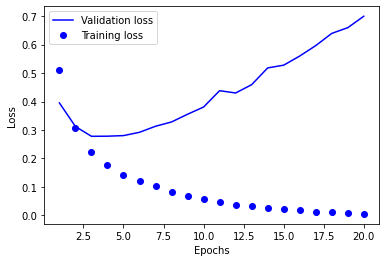

In [13]:

loss = history_dict['loss']
val_loss_values = history_dict['val_loss']#


epochs = range(1,len(history_dict['acc'])+1)


##Plotting 
plt.plot(epochs, val_loss_values,'b',label ='Validation loss')
plt.plot(epochs, loss,'bo',label ='Training loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Accuracy Plotting 
This further show the overtraining where the accuracy decreases to 87% but the accuracy on the training data is much higher at 99% 


0.8642


Text(0, 0.5, 'Accuraccy')

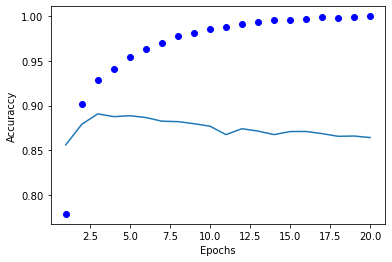

In [14]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
print(val_acc_values[-1])

plt.plot(epochs,acc_values,'bo')
plt.plot(epochs,val_acc_values)
plt.xlabel('Epochs')
plt.ylabel('Accuraccy')

The model predict function I think is doing something close to soft max where there is a pdf of the output, this gives you the probability that a review is positive 

In [15]:
model.predict(x_test)[:10]

array([[5.5735111e-03],
       [9.9999774e-01],
       [6.1487997e-01],
       [9.6001732e-01],
       [9.9643987e-01],
       [9.9869442e-01],
       [9.6816242e-01],
       [2.3841858e-06],
       [8.5792392e-01],
       [9.9999881e-01]], dtype=float32)

Below is a test on what happens when I remove a layer 
I maintiained the similar accuracy when changing some of the parameters, the standadrd deviation on the accuracy increases. 


In [16]:
model_prime = models.Sequential()
model_prime.add(layers.Dense(128,activation='relu',input_shape = (10000,)))
model_prime.add(layers.Dense(128,activation= 'relu'))
model_prime.add(layers.Dense(1,activation='sigmoid'))
model_prime.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history_prime = model_prime.fit(partial_x_train,partial_y_train,epochs= 20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.4967 - acc: 0.7637 - val_loss: 0.3292 - val_acc: 0.8720
Epoch 2/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.2604 - acc: 0.9006 - val_loss: 0.2723 - val_acc: 0.8924
Epoch 3/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.1866 - acc: 0.9315 - val_loss: 0.2909 - val_acc: 0.8883
Epoch 4/20
15000/15000 [==============================] - 1s 43us/sample - loss: 0.1263 - acc: 0.9520 - val_loss: 0.3032 - val_acc: 0.8854
Epoch 5/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.0833 - acc: 0.9706 - val_loss: 0.4576 - val_acc: 0.8576
Epoch 6/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.0639 - acc: 0.9798 - val_loss: 0.3769 - val_acc: 0.8816
Epoch 7/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.0511 - acc: 0.9853 - val_loss: 0.

0.8766


Text(0, 0.5, 'Accuracy')

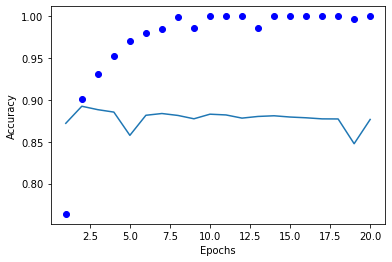

In [18]:
history_dict = history_prime.history
history_dict.keys()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
print(val_acc_values[-1])

plt.plot(epochs,acc_values,'bo')
plt.plot(epochs,val_acc_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')